In [1]:
# Required packages for today
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets
import seaborn as sns

# Familiar packages for plotting, data manipulation, and numeric functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Have plots appear in notebook
%matplotlib inline

# Default plot params
plt.style.use('seaborn')
# np.random.seed(1)

In [2]:
raw_df = pd.read_csv('data/CCdata.csv')
raw_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
CUST_ID,C10001,C10002,C10003,C10004,C10005,C10006,C10007,C10008,C10009,C10010
BALANCE,40.9007,3202.47,2495.15,1666.67,817.714,1809.83,627.261,1823.65,1014.93,152.226
BALANCE_FREQUENCY,0.818182,0.909091,1,0.636364,1,1,1,1,1,0.545455
PURCHASES,95.4,0,773.17,1499,16,1333.28,7091.01,436.2,861.49,1281.6
ONEOFF_PURCHASES,0,0,773.17,1499,16,0,6402.63,0,661.49,1281.6
INSTALLMENTS_PURCHASES,95.4,0,0,0,0,1333.28,688.38,436.2,200,0
CASH_ADVANCE,0,6442.95,0,205.788,0,0,0,0,0,0
PURCHASES_FREQUENCY,0.166667,0,1,0.083333,0.083333,0.666667,1,1,0.333333,0.166667
ONEOFF_PURCHASES_FREQUENCY,0,0,1,0.083333,0.083333,0,1,0,0.083333,0.166667
PURCHASES_INSTALLMENTS_FREQUENCY,0.083333,0,0,0,0,0.583333,1,1,0.25,0


In [3]:
raw_df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [4]:
df = raw_df.drop('CUST_ID', axis=1)
df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [5]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# Fill the Minimum Payments columns with 0
df.MINIMUM_PAYMENTS = df.MINIMUM_PAYMENTS.fillna(0)

# Since there is only 1 NaN in Credit Limit, we drop it
df = df.dropna()
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8949.0,1564.647593,2081.584016,0.0,128.365782,873.680279,2054.372848,19043.13856
BALANCE_FREQUENCY,8949.0,0.877350,0.236798,0.0,0.888889,1.000000,1.000000,1.00000
PURCHASES,8949.0,1003.316936,2136.727848,0.0,39.800000,361.490000,1110.170000,49039.57000
ONEOFF_PURCHASES,8949.0,592.503572,1659.968851,0.0,0.000000,38.000000,577.830000,40761.25000
INSTALLMENTS_PURCHASES,8949.0,411.113579,904.378205,0.0,0.000000,89.000000,468.650000,22500.00000
CASH_ADVANCE,8949.0,978.959616,2097.264344,0.0,0.000000,0.000000,1113.868654,47137.21176
PURCHASES_FREQUENCY,8949.0,0.490405,0.401360,0.0,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8949.0,0.202480,0.298345,0.0,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8949.0,0.364478,0.397451,0.0,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8949.0,0.135141,0.200132,0.0,0.000000,0.000000,0.222222,1.50000


Text(0.5, 1.0, 'Multi-Collinearity of Car Attributes')

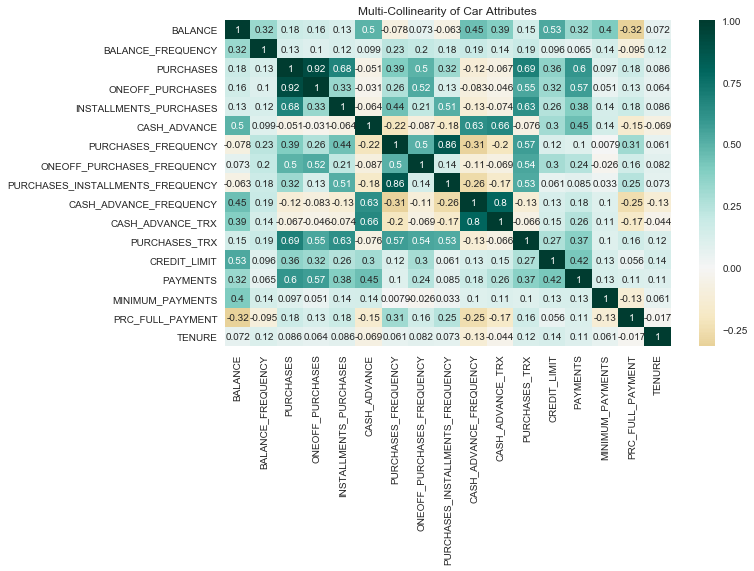

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)

ax.set_title('Multi-Collinearity of Car Attributes')

In [9]:
df = df.drop(['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'TENURE', 'PAYMENTS', 'ONEOFF_PURCHASES_FREQUENCY', 'INSTALLMENTS_PURCHASES'], axis=1)

In [10]:
df['bal_cash_credit'] = df.apply(lambda x: 1 if x['BALANCE']>=1000 and x['CREDIT_LIMIT']>=1000 and x['CASH_ADVANCE']<1 else 0, axis=1)

In [29]:
#df['purchase/transaction'] = df.apply(lambda x: 0 if x['PURCHASE_TRX'] == 0 else x['PURCHASES']/x['PURCHASES_TRX'], axis=1)
df['purchase/transaction'] = df.apply(lambda x:  x['PURCHASES']/x['PURCHASES_TRX'], axis=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [30]:
df.head().T

,0,1,2,3,4
BALANCE,40.900749,3202.467416,2495.148862,1666.670542,817.714335
BALANCE_FREQUENCY,0.818182,0.909091,1.000000,0.636364,1.000000
PURCHASES,95.400000,0.000000,773.170000,1499.000000,16.000000
CASH_ADVANCE,0.000000,6442.945483,0.000000,205.788017,0.000000
PURCHASES_FREQUENCY,0.166667,0.000000,1.000000,0.083333,0.083333
CASH_ADVANCE_FREQUENCY,0.000000,0.250000,0.000000,0.083333,0.000000
PURCHASES_TRX,2.000000,0.000000,12.000000,1.000000,1.000000
CREDIT_LIMIT,1000.000000,7000.000000,7500.000000,7500.000000,1200.000000
MINIMUM_PAYMENTS,139.509787,1072.340217,627.284787,0.000000,244.791237
PRC_FULL_PAYMENT,0.000000,0.222222,0.000000,0.000000,0.000000


## K-Means Clustering

In [12]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import calinski_harabaz_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [13]:
ss = StandardScaler()
scaled_data = ss.fit_transform(df)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
scaled_df=pd.DataFrame(data=scaled_data)
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.732054,-0.249881,-0.424934,-0.466805,-0.806649,-0.675294,-0.511381,-0.960380,-0.297334,-0.525588,-0.388774
1,0.786858,0.134049,-0.469584,2.605438,-1.221928,0.573949,-0.591841,0.688601,0.101998,0.234159,-0.388774
2,0.447041,0.517980,-0.107716,-0.466805,1.269742,-0.675294,-0.109082,0.826016,-0.088524,-0.525588,2.572192
3,0.049015,-1.017743,0.231995,-0.368678,-1.014290,-0.258882,-0.551611,0.826016,-0.357057,-0.525588,-0.388774
4,-0.358849,0.517980,-0.462095,-0.466805,-1.014290,-0.675294,-0.551611,-0.905414,-0.252265,-0.525588,-0.388774


In [15]:
pca = PCA(n_components=2)
#pca_data = pca.fit_transform(scaled_df)
pca_data = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(data=pca_data, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.678140,-0.127804
1,0.332563,2.547244
2,1.363916,-0.979882
3,-0.617898,0.423266
4,-1.355871,0.159694


In [21]:
model = KMeans(n_clusters=3, random_state=10).fit(pca_df)
#model = model.cluster_centers_
model_label = model.labels_
model_centers = model.cluster_centers_

# sorted(model.cluster_centers_.tolist())

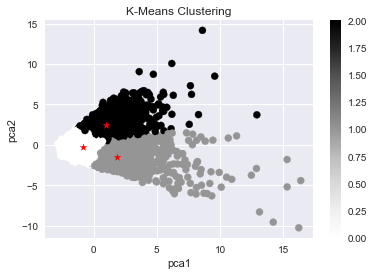

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(pca_df['pca1'],pca_df['pca2'],
                    c=model_label,s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
plt.colorbar(scatter)
plt.scatter(model_centers[:,0], model_centers[:,1], c='red', marker='*');

In [18]:
pca.components_

array([[ 0.41778345,  0.28825012,  0.41585394,  0.18220843,  0.26661444,
         0.11180311,  0.4210136 ,  0.39443838,  0.24593154, -0.02562283,
         0.24223606],
       [ 0.34610529,  0.05787551, -0.25483148,  0.44181591, -0.39099631,
         0.47745728, -0.29409188,  0.09278099,  0.13981858, -0.30660635,
        -0.16499262]])

* Largest Values in pca1 = index 0 (balance) and 2 (purchases) and 6 (purchase transactions)
      
* Largest Values in pca2 = index 3 (cash adv) and 5 (cash adv freq)

Points far to the right are roughly correlated 

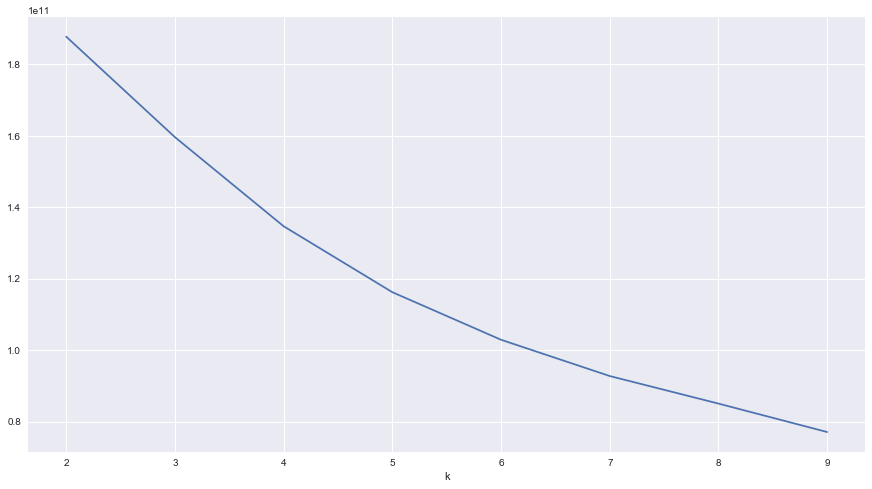

In [19]:
# Specifying the dataset and initializing variables
X = df
distorsions = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.xlabel('k')
plt.plot(range(2, 10), distorsions)
plt.grid(True)

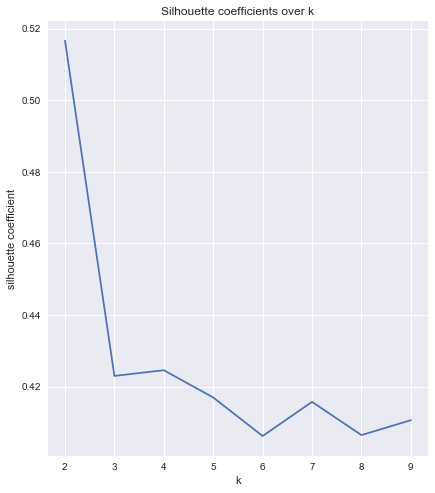

In [20]:
# Generate silhouette coefficient for each k
X = df
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)
    
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.grid(True)